Fundamentals
=================

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl

mpl.rcParams['font.size'] = 16
sns.set_context("talk")
sns.set_style('white', {'axes.facecolor': 'none'})

In [2]:
def plot(x, y, xlabel='', ylabel=''):
    plt.plot(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sns.despine()
    ax = plt.gca()
    fig = plt.gcf()
    return ax, fig

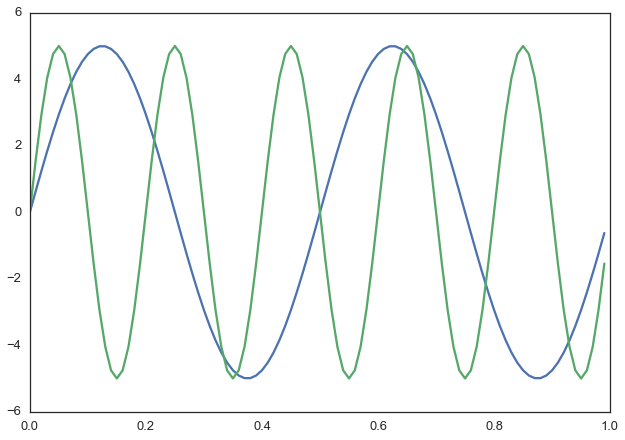

In [3]:
t = np.arange(0.0, 1.0, 0.01)
amp = 5

freq = 2
y = amp * np.sin(freq*2*t*np.pi)
plt.plot(t, y)

freq2 = 5
y2 = amp * np.sin(freq2*2*t*np.pi)
plt.plot(t, y2)

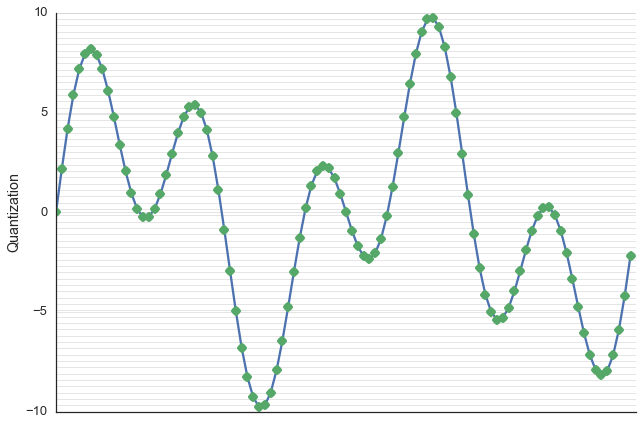

In [4]:
# sns.set_style('whitegrid')
yadd = y+y2
ysamp = yadd[::5]
tsamp = t[::5]
plt.plot(t, yadd)
plt.plot(t, yadd, 'o')
sns.despine()
ax = plt.gca()
fig = plt.gcf()

# fig.savefig('img/discretize.png', transparent=True)

# x grid
# ax.set_xticks(t,)
# ax.get_yaxis().set_ticks([])
# ax.grid(b=True, which='major', linewidth=0.5, axis='x')
# ax.set_xticklabels('')
# plt.xlabel('Sampling')
# fig.savefig('img/sampling.png', transparent=True)

# y grid
ax.get_xaxis().set_ticks([])
ax.set_yticks(np.linspace(-10,10,64), minor=True)
ax.grid(b=True, which='major', linewidth=0.5, axis='y')
ax.grid(b=True, which='minor', linewidth=0.5, axis='y')
plt.ylabel('Quantization')
fig.savefig('img/quantize.png', transparent=True)

# fig.savefig('img/discretize_grid.png', transparent=True)

4 bit resolution: 1.25
8 bit resolution: 0.078125
16 bit resolution: 0.00030517578125
(1000,) (1000,)


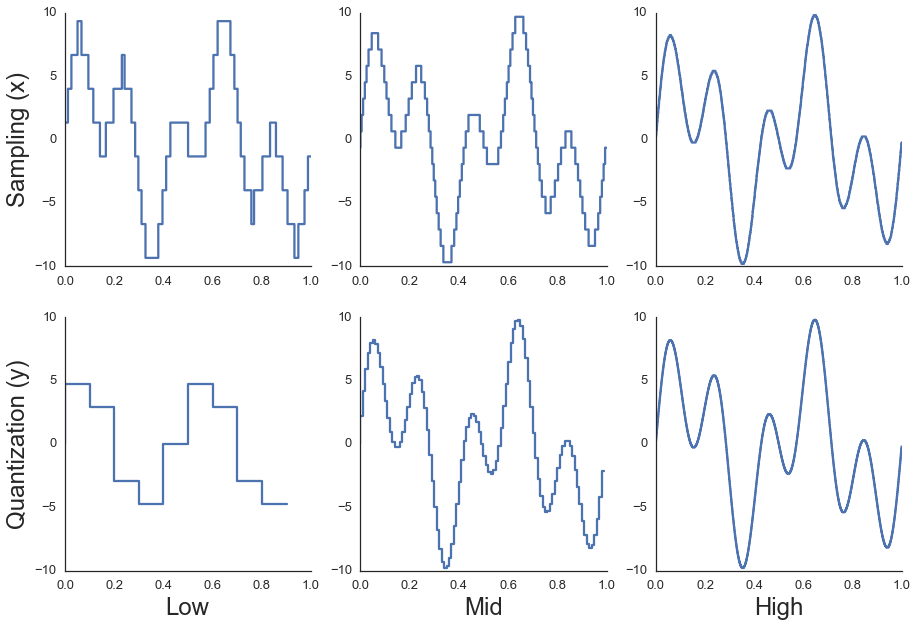

In [8]:
def nearest_point(data, points):
    data = data.copy()
    for i in range(len(data)):
        point = data[i]
        min_idx = abs(points - point).argmin()
#         print point, min_idx, points[min_idx]
        data[i] = points[min_idx]
    return data

print '4 bit resolution:', 20./16
print '8 bit resolution:', 20./256
print '16 bit resolution:', 20./65536

fig = plt.figure(figsize=(15,10))

t = np.arange(0.0, 1.0, 0.001)
print t.shape, yadd.shape

yadd = amp * np.sin(2*2*t*np.pi)  + amp * np.sin(5*2*t*np.pi)

levels4 = np.linspace(-20, 20, 16)
levels8 = np.linspace(-20, 20, 32)
levels16 = np.linspace(-20, 20, 256)

y4 = nearest_point(yadd, levels4)
plt.subplot(2,3,1)
plt.step(t, y4)
plt.xlim((0,1))
plt.ylim((-10,10))
sns.despine()
plt.ylabel('Sampling (x)', fontsize=24)

y8 = nearest_point(yadd, levels8)
plt.subplot(2,3,2)
plt.step(t, y8)
plt.xlim((0,1))
plt.ylim((-10,10))
sns.despine()

y16 = nearest_point(yadd, levels16)
plt.subplot(2,3,3)
plt.step(t, y16)
plt.xlim((0,1))
plt.ylim((-10,10))
sns.despine()

t = np.arange(0.0, 1.0, 0.1)

ylowsamp = amp * np.sin(2*2*t*np.pi)  + amp * np.sin(5*2*t*np.pi)
plt.subplot(2,3,4)
plt.step(t, ylowsamp)
plt.xlim((0,1))
plt.ylim((-10,10))
sns.despine()
plt.ylabel('Quantization (y)', fontsize=24)
plt.xlabel('Low', fontsize=24)

t = np.arange(0.0, 1.0, 0.01)

ylowsamp = amp * np.sin(2*2*t*np.pi)  + amp * np.sin(5*2*t*np.pi)
plt.subplot(2,3,5)
plt.step(t, ylowsamp)
plt.xlim((0,1))
plt.ylim((-10,10))
sns.despine()
plt.xlabel('Mid', fontsize=24)

t = np.arange(0.0, 1.0, 0.001)

ylowsamp = amp * np.sin(2*2*t*np.pi)  + amp * np.sin(5*2*t*np.pi)
plt.subplot(2,3,6)
plt.step(t, ylowsamp)
plt.xlim((0,1))
plt.ylim((-10,10))
sns.despine()
plt.xlabel('High', fontsize=24)

fig.savefig('img/sampled.png', transparent=True)

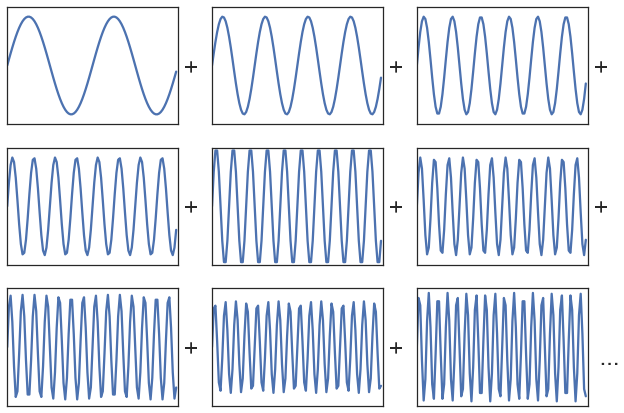

In [17]:
t = np.arange(0.0, 1.0, 0.01)

sumplot = np.zeros_like(t)
count = 1
for i in range(2,20,2):
    ax = plt.subplot(3,3,count)
    sig = np.sin(i*2*t*np.pi)/i
    plt.plot(t, sig)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_ticks([])
    ax.yaxis.set_label_position("right")
    plt.ylabel('+', fontsize=24)
    sumplot += sig
    count +=1

plt.ylabel(' ...', fontsize=24, rotation='horizontal', horizontalalignment='left')
fig = plt.gcf()
# fig.savefig('sin_components.png', transparent=True)

for i in range(20,100,2):
    sumplot += np.sin(i*2*t*np.pi)/i

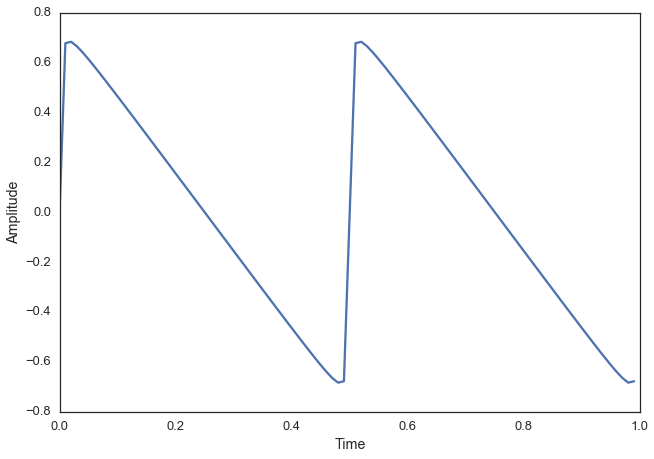

In [18]:
plt.plot(t, sumplot)
fig = plt.gcf()
plt.ylabel('Amplitude')
plt.xlabel("Time")
# fig.savefig('sawtooth.png', transparent=True)

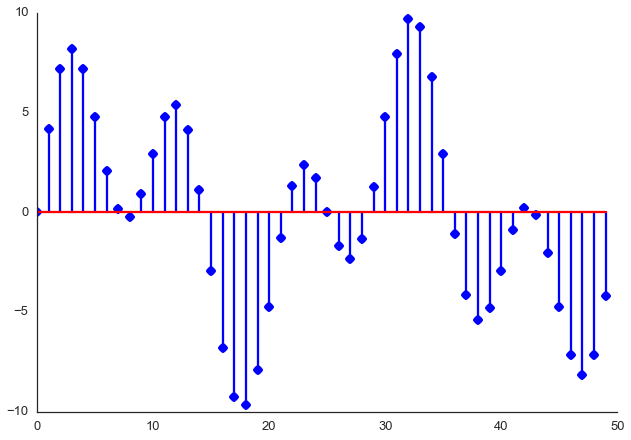

In [10]:
t = np.arange(0.0, 1.0, 0.02)

yadd = amp * np.sin(5*2*t*np.pi) + amp * np.sin(2*2*t*np.pi)

fig = plt.figure()
plt.stem(yadd)

sns.despine()
fig.savefig('img/stem.png', transparent=True)

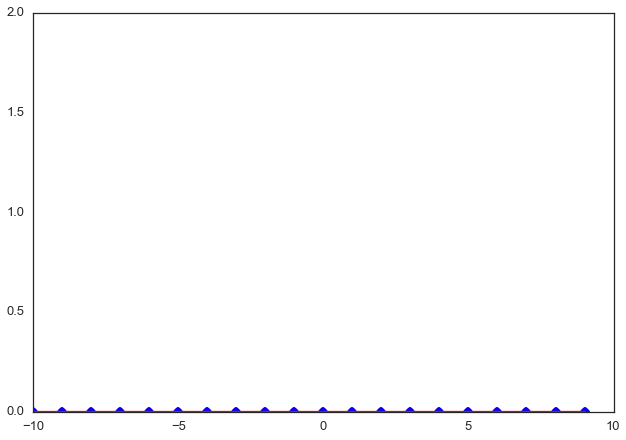

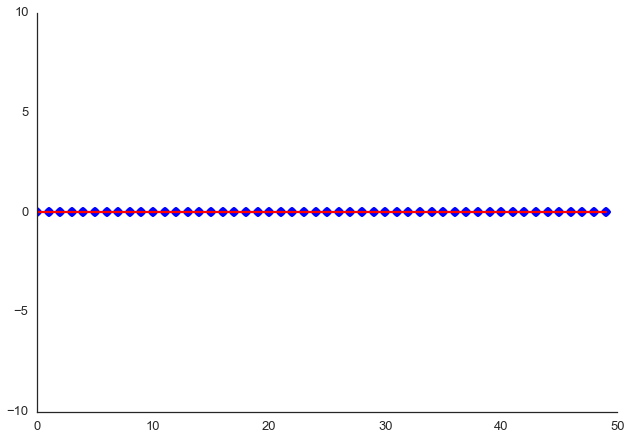

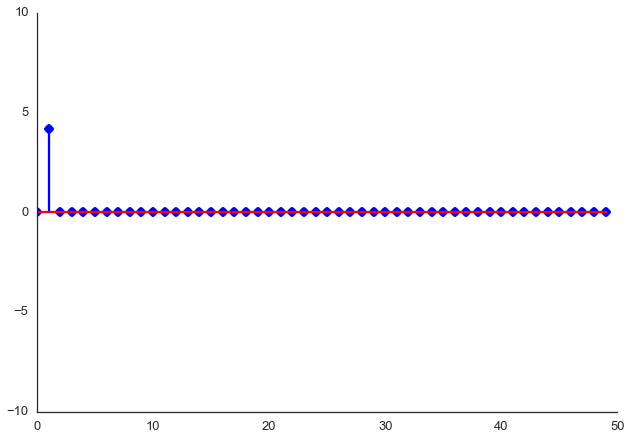

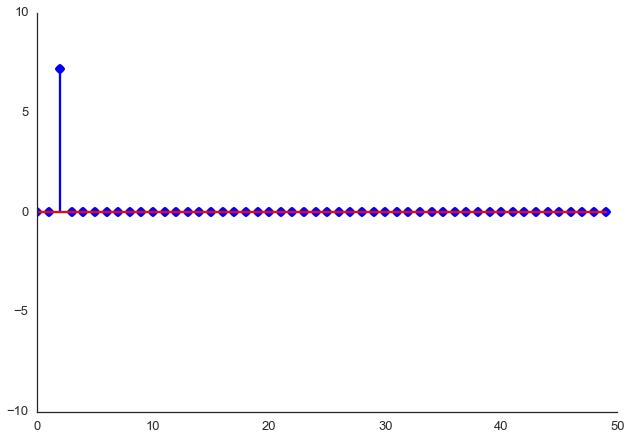

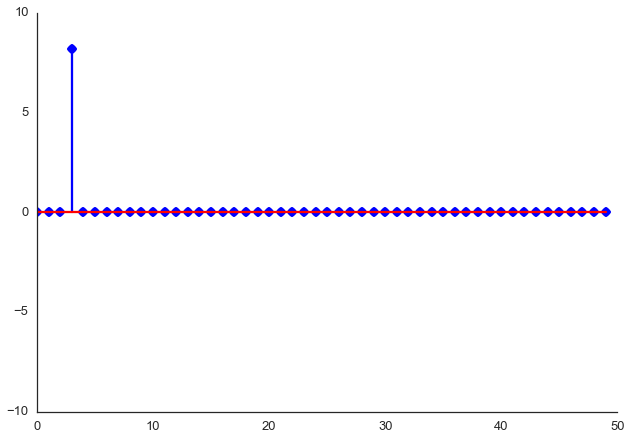

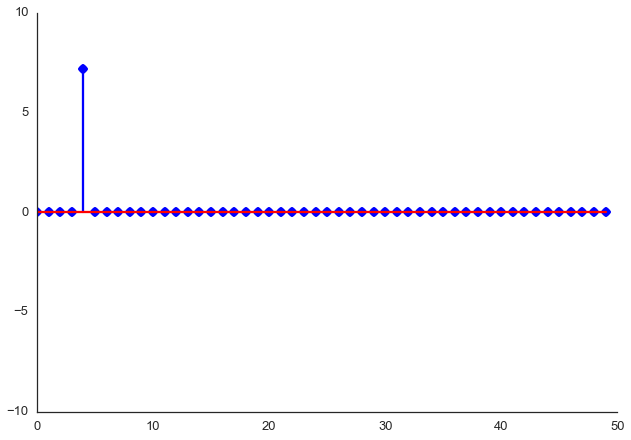

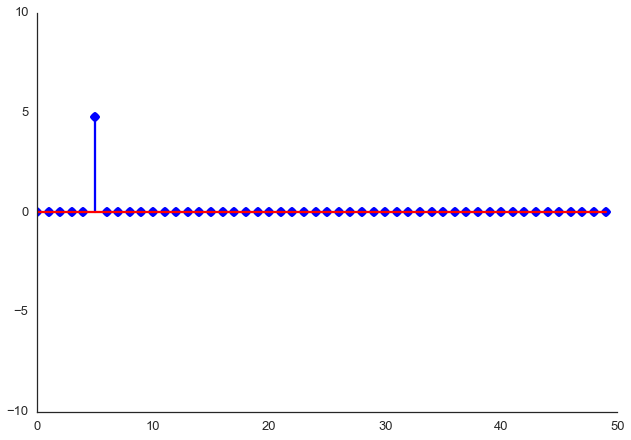

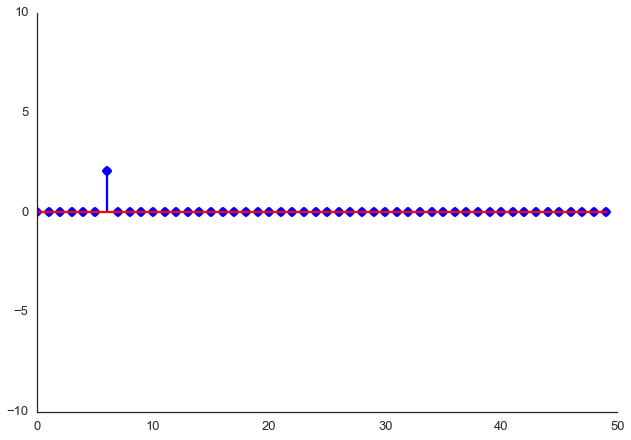

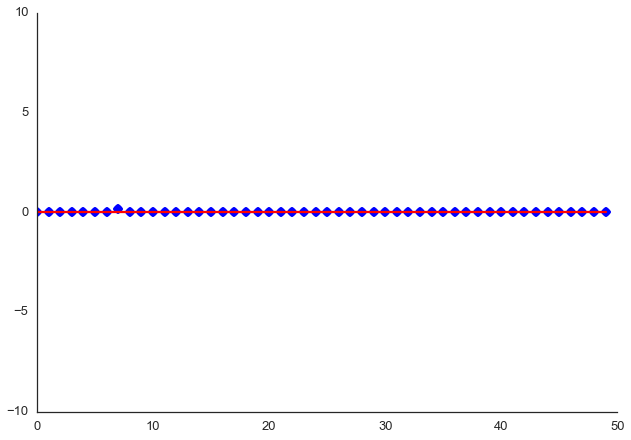

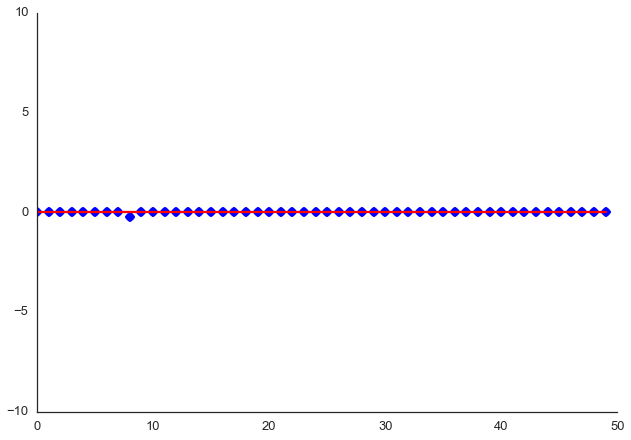

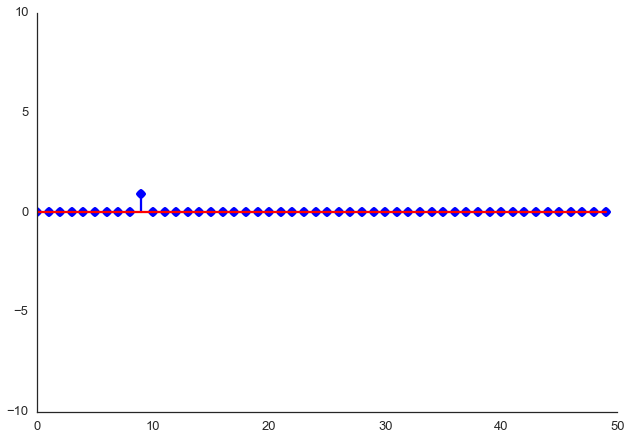

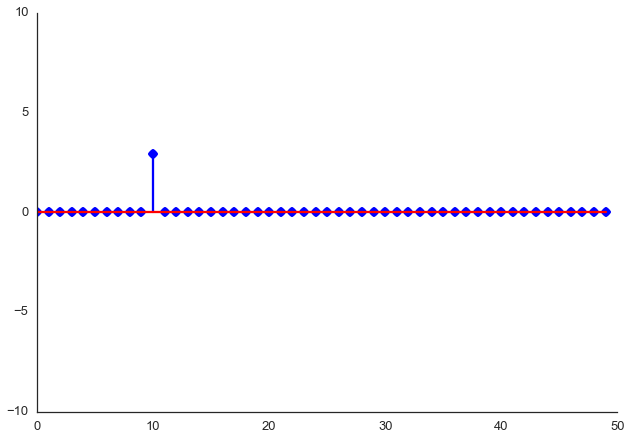

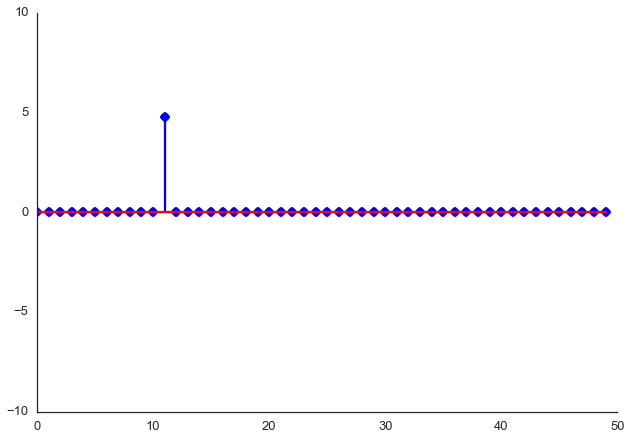

In [13]:

y0 = np.zeros_like(yadd)

for i in range(12):
    y0[i] = yadd[i]
    fig = plt.figure()
    plt.stem(y0)
    plt.xlim((0,50))
    plt.ylim((-10,10))
    
    sns.despine()
    fig.savefig('img/stem_'+str(i)+'.png', transparent=True)
    y0[i] = 0

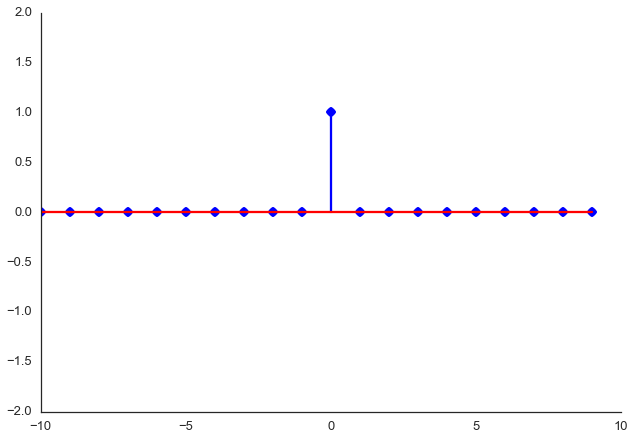

In [17]:
# save a delta function plot
fig = plt.figure()
y0 = np.zeros((20,))
y0[10] = 1
plt.stem(np.arange(-10,10), y0)
plt.xlim((-10,10))
plt.ylim((-2,2))
sns.despine()

fig.savefig('img/delta.png', transparent=True)

Aliasing
----------

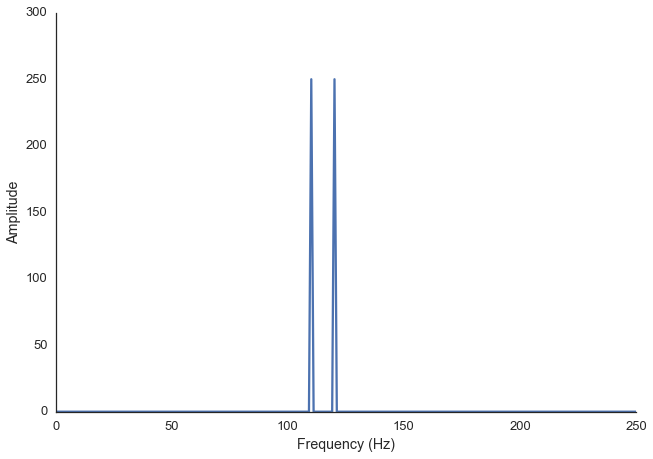

In [25]:
fs = 500
step_size = 1./fs
t = np.arange(0.0, 1.0, step_size)
freq0 = 120
freq1 = 110
twotone = np.sin(t*freq0*2*np.pi) + np.sin(t*freq1*2*np.pi)

spectrum = np.fft.rfft(twotone)
freqs = np.fft.rfftfreq(len(twotone), 1./fs)

ax, fig = plot(freqs, abs(spectrum), 'Frequency (Hz)', 'Amplitude')
fig.savefig('img/noalias.png', transparent=True)

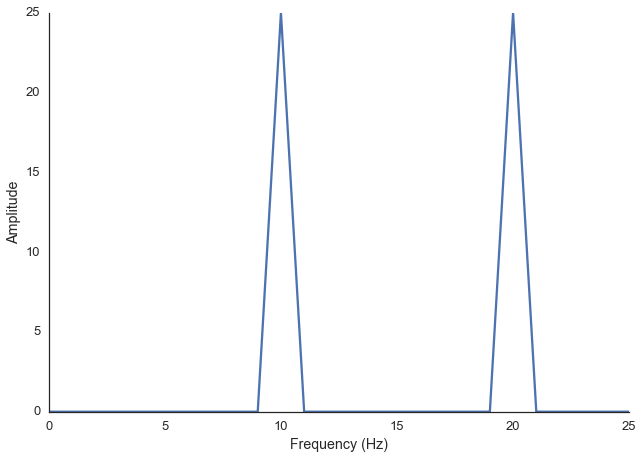

In [26]:
fs = 50
step_size = 1./fs
t = np.arange(0.0, 1.0, step_size)
freq0 = 120
freq1 = 110
twotone = np.sin(t*freq0*2*np.pi) + np.sin(t*freq1*2*np.pi)

spectrum = np.fft.rfft(twotone)
freqs = np.fft.rfftfreq(len(twotone), 1./fs)

ax, fig = plot(freqs, abs(spectrum), 'Frequency (Hz)', 'Amplitude')
fig.savefig('img/alias.png', transparent=True)

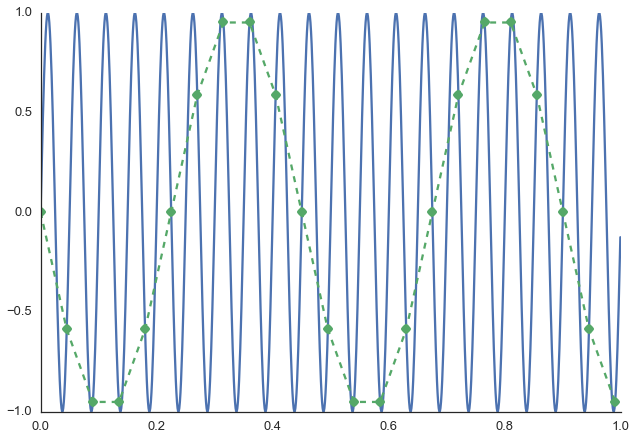

In [42]:
t = np.arange(0.0, 1.0, 0.001)

freq = 20
y = np.sin(freq*2*t*np.pi)
ysamp = y[::45]
tsamp = t[::45]
plt.plot(t, y)
plt.plot(tsamp, ysamp,'o--')
sns.despine()

fig = plt.gcf()
fig.savefig('img/aliasing.png', transparent=True)